### Practical Project I (Linear Regression)

#### 00-Libraries

In [67]:
##########################################################
# Import Libraries to start work
##########################################################
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

#### 01-Data & Transformation

In [68]:
##########################################################
# Function to read file and select the amount of rows
##########################################################

def load_data_csv(file_name,rows_number=0):
    if rows_number > 0 :
        df = pd.read_csv(file_name, nrows=rows_number)
    else:
        df = pd.read_csv(file_name) 
    return df

In [69]:
df = load_data_csv(file_name="insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [70]:
##########################################################
# Function to change text columns to number
##########################################################

def change_columns(dataframe_input):
    #change column sex from char to int
    dataframe_input['sex'] =  dataframe_input['sex'].replace('male', 0)
    dataframe_input['sex'] =  dataframe_input['sex'].replace('female', 1)

    #change column smoker from char to int
    dataframe_input['smoker'] =  dataframe_input['smoker'].replace('no', 0)
    dataframe_input['smoker'] =  dataframe_input['smoker'].replace('yes', 1)

    #change column region from char to int
    #When latitude is north=0 and south=1 and longitude is east=0 and west=1
    for i in range(0,len(dataframe_input)):
        if dataframe_input.loc[i, 'region'] == "southwest":
                dataframe_input.loc[i, 'lat'] = 1
                dataframe_input.loc[i, 'long'] = 1
        elif dataframe_input.loc[i, 'region'] == "southeast":
                dataframe_input.loc[i, 'lat'] = 1
                dataframe_input.loc[i, 'long'] = 0
        elif dataframe_input.loc[i, 'region'] == "northwest":
                dataframe_input.loc[i, 'lat'] = 0
                dataframe_input.loc[i, 'long'] = 1
        else:
                dataframe_input.loc[i, 'lat'] = 0
                dataframe_input.loc[i, 'long'] = 0
    dataframe_input.drop(['region'], axis=1, inplace=True)

    return dataframe_input

In [71]:
df = change_columns(dataframe_input=df)
df.head(10)

,age,sex,bmi,children,smoker,charges,lat,long
0,19,1,27.900,0,1,16884.92400,1.0,1.0
1,18,0,33.770,1,0,1725.55230,1.0,0.0
2,28,0,33.000,3,0,4449.46200,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0
5,31,1,25.740,0,0,3756.62160,1.0,0.0
6,46,1,33.440,1,0,8240.58960,1.0,0.0
7,37,1,27.740,3,0,7281.50560,0.0,1.0
8,37,0,29.830,2,0,6406.41070,0.0,0.0
9,60,1,25.840,0,0,28923.13692,0.0,1.0


#### 02- Explore Data Analisis

<AxesSubplot:>

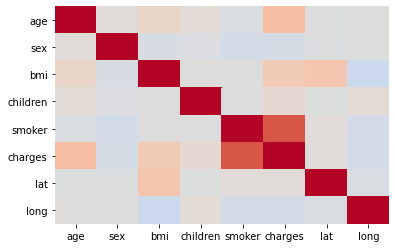

In [72]:
##########################################################
# Data heatmap with each feature
##########################################################
sns.heatmap(df.corr(), cmap="coolwarm", cbar=False, vmin=-1, vmax=1)

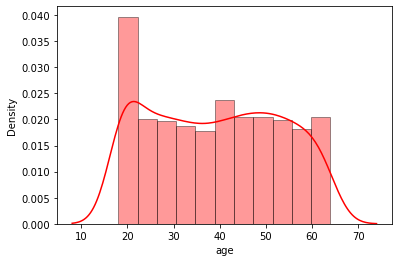

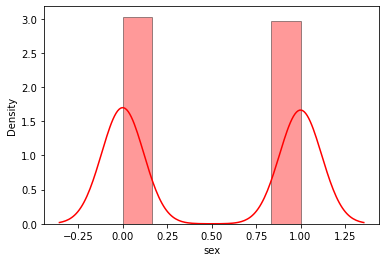

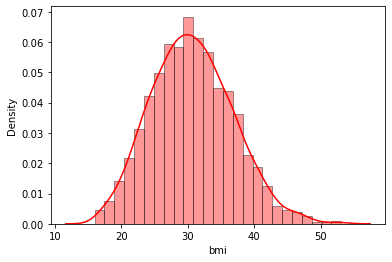

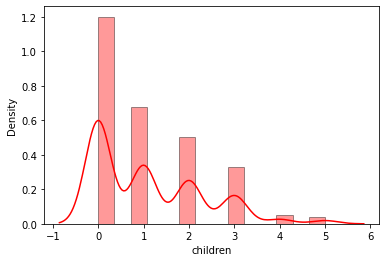

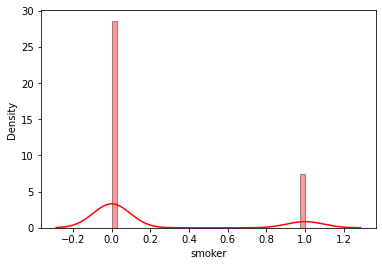

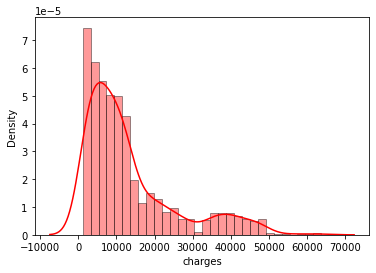

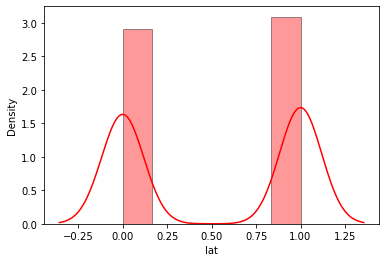

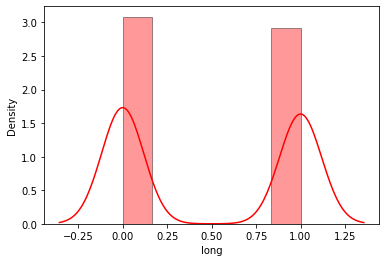

In [73]:
##########################################################
# Function to plot each distribution feature
##########################################################
import warnings
warnings.filterwarnings('ignore')
for column in df.columns:
    plt.figure()
    sns.distplot(df[column], color='red', hist_kws={"edgecolor": 'black'})

#### 03-Build Math Functions Multiple Variable

In [74]:
import math, copy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

##### 03.01-Raw data and aplly Functions

In [75]:
##########################################################
# Split Features and Target
##########################################################
X_train = np.array(df[["age","sex","bmi","children","smoker","lat","long"]].values)
y_train = np.array(df["charges"].values)

In [76]:
##########################################################
# Set first values for b & w parameters
##########################################################

b_init = 10
w_init = np.array([ 1, 0.1, 50, 1, 0.1, 0.1, 0.1])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (7,), b_init type: <class 'int'>


In [77]:
##########################################################
# Linear regression multiple features
##########################################################
def predict_single_loop(x, w, b): 
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p

In [78]:
##########################################################
# Linear regression multiple features matrix times
##########################################################
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

In [79]:
##########################################################
# One row test model
##########################################################
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (7,), x_vec value: [19.   1.  27.9  0.   1.   1.   1. ]
f_wb shape (), prediction: 1424.4


In [80]:
##########################################################
# Cost function
##########################################################
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [81]:
##########################################################
# Compute and display cost using start values parameters
##########################################################
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 140824854.83447534


In [82]:
##########################################################
# Gradient function
##########################################################
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [83]:
##########################################################
#Compute and display gradient 
##########################################################
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -11686.78044899777
dj_dw at initial w,b: 
 [-508374.93   -5442.4  -371125.27  -13781.14   -6238.71   -6156.49
   -5264.45]


In [84]:
##########################################################
# Gradient Descent function
##########################################################
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [85]:
##########################################################
# Run model with parameters
##########################################################
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 500
alpha = 1.0e-6

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape


prediction_values = np.zeros(m)
target_values = np.zeros(m)
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")
    prediction_values[i] = np.dot(X_train[i], w_final) + b_final
    target_values[i] = y_train[i]    

Iteration    0: Cost 160819618.90   
Iteration   50: Cost 138728836.05   
Iteration  100: Cost 121749176.57   
Iteration  150: Cost 108698038.97   
Iteration  200: Cost 98666449.75   
Iteration  250: Cost 90955751.92   
Iteration  300: Cost 85028942.37   
Iteration  350: Cost 80473268.68   
Iteration  400: Cost 76971480.32   
Iteration  450: Cost 74279731.51   
b,w found by gradient descent: 3.65,[158.85   1.63 117.59   4.46   2.68   1.94   1.57] 
prediction: 6310.45, target value: 16884.924
prediction: 6840.42, target value: 1725.5523
prediction: 8347.33, target value: 4449.462
prediction: 7917.28, target value: 21984.47061
prediction: 8484.54, target value: 3866.8552
prediction: 7958.46, target value: 3756.6216
prediction: 11251.17, target value: 8240.5896
prediction: 9159.76, target value: 7281.5056
prediction: 9397.86, target value: 6406.4107
prediction: 12576.62, target value: 28923.136919999997
prediction: 7058.20, target value: 2721.3208
prediction: 12950.30, target value: 27808

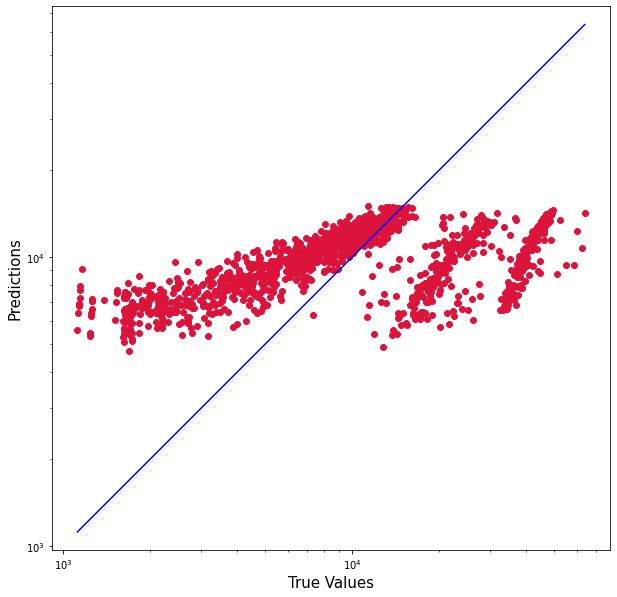

In [86]:
##########################################################
# Plot Results
##########################################################

plt.figure(figsize=(10,10))
plt.scatter(target_values, prediction_values, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_values), max(target_values))
p2 = min(min(prediction_values), min(target_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

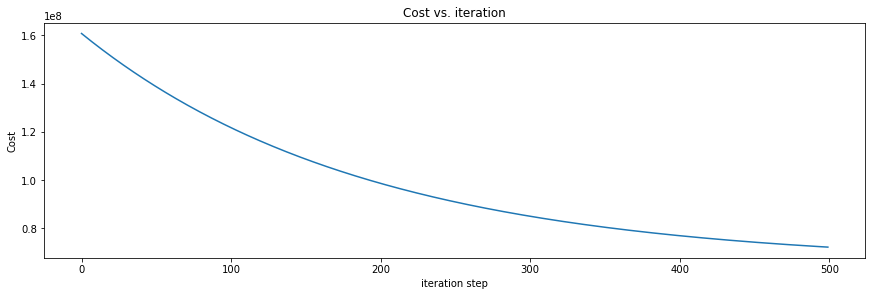

In [87]:
##########################################################
# plot cost versus iteration
##########################################################
# 
fig, (ax1) = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')              
ax1.set_xlabel('iteration step')  
plt.show()

##### 03.02-Normalize data and aplly Functions

In [88]:
##########################################################
# Function to normalize features
##########################################################
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

In [89]:
df_raw = load_data_csv(file_name="insurance.csv")
df_raw = change_columns(dataframe_input=df_raw)
df_raw.head(10)

,age,sex,bmi,children,smoker,charges,lat,long
0,19,1,27.900,0,1,16884.92400,1.0,1.0
1,18,0,33.770,1,0,1725.55230,1.0,0.0
2,28,0,33.000,3,0,4449.46200,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0
5,31,1,25.740,0,0,3756.62160,1.0,0.0
6,46,1,33.440,1,0,8240.58960,1.0,0.0
7,37,1,27.740,3,0,7281.50560,0.0,1.0
8,37,0,29.830,2,0,6406.41070,0.0,0.0
9,60,1,25.840,0,0,28923.13692,0.0,1.0


In [90]:
##########################################################
# Apply normalize
##########################################################
df_raw[["age","sex","bmi","children","smoker","lat","long"]], X_mu, X_sigma = zscore_normalize_features(df_raw[["age","sex","bmi","children","smoker","lat","long"]])
df_raw.head(10)

,age,sex,bmi,children,smoker,charges,lat,long
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,16884.92400,0.970538,1.028816
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,1725.55230,0.970538,-0.971991
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,4449.46200,0.970538,-0.971991
3,-0.441948,-0.989591,-1.305531,-0.908614,-0.507463,21984.47061,-1.030356,1.028816
4,-0.513149,-0.989591,-0.292556,-0.908614,-0.507463,3866.85520,-1.030356,1.028816
5,-0.584350,1.010519,-0.807656,-0.908614,-0.507463,3756.62160,0.970538,-0.971991
6,0.483668,1.010519,0.455486,-0.078767,-0.507463,8240.58960,0.970538,-0.971991
7,-0.157143,1.010519,-0.479567,1.580926,-0.507463,7281.50560,-1.030356,1.028816
8,-0.157143,-0.989591,-0.136714,0.751079,-0.507463,6406.41070,-1.030356,-0.971991
9,1.480485,1.010519,-0.791252,-0.908614,-0.507463,28923.13692,-1.030356,1.028816


In [91]:
##########################################################
# Split Features and Target
##########################################################
X_train = np.array(df_raw[["age","sex","bmi","children","smoker","lat","long"]].values)
y_train = np.array(df_raw["charges"].values)

In [92]:
##########################################################
# Set first values for b & w parameters
##########################################################

b_init = 10
w_init = np.array([ 1, 0.1, 50, 1, 0.1, 0.1, 0.1])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (7,), b_init type: <class 'int'>


In [93]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (7,), x_vec value: [-1.44  1.01 -0.45 -0.91  1.97  0.97  1.03]
f_wb shape (), prediction: -14.515332064548502


In [94]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 161066714.43384907


In [95]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -13260.422265141278
dj_dw at initial w,b: 
 [-3613.13   691.33 -2350.88  -821.47 -9529.8   -336.77   857.33]


In [96]:
##########################################################
# Run model with parameters
##########################################################
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 500
alpha = 1.0e-6

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape

prediction_values = np.zeros(m)
target_values = np.zeros(m)
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")
    prediction_values[i] = np.dot(X_train[i], w_final) + b_final
    target_values[i] = y_train[i]
    

Iteration    0: Cost 161323148.98   
Iteration   50: Cost 161308758.82   
Iteration  100: Cost 161294370.12   
Iteration  150: Cost 161279982.87   
Iteration  200: Cost 161265597.09   
Iteration  250: Cost 161251212.76   
Iteration  300: Cost 161236829.90   
Iteration  350: Cost 161222448.49   
Iteration  400: Cost 161208068.53   
Iteration  450: Cost 161193690.04   
b,w found by gradient descent: 6.63,[ 1.81 -0.35  1.2   0.41  4.76  0.17 -0.43] 
prediction: 11.87, target value: 16884.924
prediction: 2.99, target value: 1725.5523
prediction: 4.81, target value: 4449.462
prediction: 1.20, target value: 21984.47061
prediction: 2.28, target value: 3866.8552
prediction: 2.05, target value: 3756.6216
prediction: 5.84, target value: 8240.5896
prediction: 3.03, target value: 7281.5056
prediction: 4.66, target value: 6406.4107
prediction: 4.60, target value: 28923.136919999997
prediction: 1.72, target value: 2721.3208
prediction: 17.96, target value: 27808.7251
prediction: 2.56, target value: 

In [97]:
from lab_utils_multi import  load_house_data, run_gradient_descent 

In [98]:
w_norm, b_norm, hist = run_gradient_descent(df_raw[["age","sex","bmi","children","smoker","lat","long"]].values, y_train,500,1.0e-6, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 1.61323e+08  3.6e-03 -6.9e-04  2.4e-03  8.2e-04  1.3e-02 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
       50 1.61309e+08  1.8e-01 -3.5e-02  1.2e-01  4.2e-02  6.8e-01 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
      100 1.61294e+08  3.7e-01 -7.0e-02  2.4e-01  8.3e-02  1.3e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
      150 1.61280e+08  5.5e-01 -1.0e-01  3.6e-01  1.2e-01  2.0e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
      200 1.61266e+08  7.3e-01 -1.4e-01  4.8e-01  1.7e-01  2.7e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
      250 1.61251e+08  9.1e-01 -1.7e-01  6.0e-01  2.1e-01  3.3e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
      300 1.61237e+08  1.1e+00 -2.1e-01  7.2e-01  2.5e-01  4.0e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -

In [99]:
m,_ = X_train.shape
prediction_values = np.zeros(m)
target_values = np.zeros(m)
for i in range(m):
    x_house = np.array(X_train[i])
    x_house_norm = (x_house - X_mu) / X_sigma
    prediction_values[i] = np.dot(x_house_norm, w_norm) + b_norm
    target_values[i] = y_train[i]    

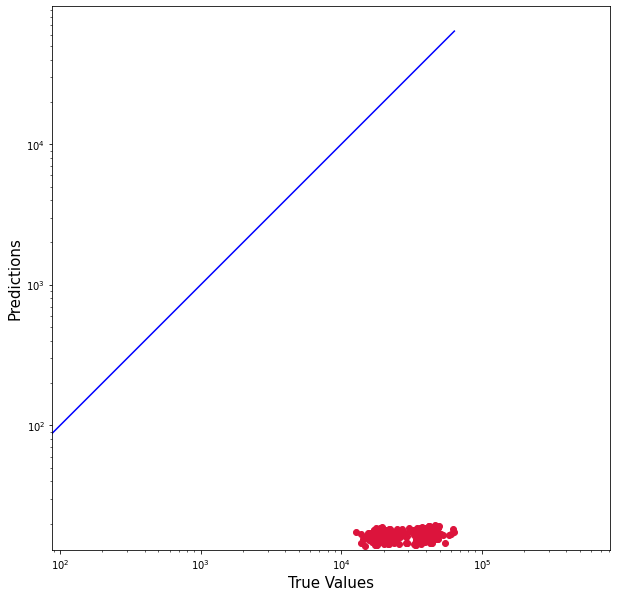

In [100]:
plt.figure(figsize=(10,10))
plt.scatter(target_values, prediction_values, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_values), max(target_values))
p2 = min(min(prediction_values), min(target_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### 03.03-K Fold Aplication

In [102]:
##########################################################
# Split dataframe in folds
##########################################################                                                             
fold1 = df.loc[0:223]                                            
fold2 = df.loc[224:446]
fold3 = df.loc[447:669]
fold4 = df.loc[670:893]
fold5 = df.loc[894:1117]
fold6 = df.loc[1118:1338]

In [103]:
##########################################################
# merge folds and separate test fold
##########################################################

df_1 = pd.concat([fold1, fold2, fold3, fold4, fold5])
test_val1 = fold6

df_2 = pd.concat([fold1, fold2, fold3, fold5, fold6])
test_val2 = fold5

df_3 = pd.concat([fold1, fold2, fold3, fold5, fold6])
test_val3 = fold4

df_4 = pd.concat([fold1, fold2, fold4, fold5, fold6])
test_val4 = fold3

df_5 = pd.concat([fold1, fold3, fold4, fold5, fold6])
test_val5 = fold2

df_6 = pd.concat([fold2, fold3, fold4, fold5, fold6])
test_val6 = fold1

In [104]:
##########################################################
# Function model to run each fold
##########################################################

def run_model(df_fold, test_fold):
    X_train = np.array(df_fold[["age","sex","bmi","children","smoker","lat","long"]].values)
    y_train = np.array(df_fold["charges"].values)
    X_test = np.array(test_fold[["age","sex","bmi","children","smoker","lat","long"]].values)
    y_test = np.array(test_fold["charges"].values)

    # initialize parameters
    initial_w = np.zeros_like(w_init)
    initial_b = 0.
    # some gradient descent settings
    iterations = 500
    alpha = 1.0e-6
    #alpha = 1.0e-2
    # run gradient descent 
    w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                        compute_cost, compute_gradient, 
                                                        alpha, iterations)
    print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
    m,_ = X_train.shape
    t,_ = X_test.shape

    prediction_values = np.zeros(t)
    target_values = np.zeros(t)
    for i in range(m):
        print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

    for i in range(t):
        prediction_values[i] = np.dot(X_test[i], w_final) + b_final
        target_values[i] = y_test[i]
    
    plt.figure(figsize=(5,5))
    plt.scatter(target_values, prediction_values, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(prediction_values), max(target_values))
    p2 = min(min(prediction_values), min(target_values))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    return plt.show()

Iteration    0: Cost 162107252.92   
Iteration   50: Cost 139851915.76   
Iteration  100: Cost 122750627.72   
Iteration  150: Cost 109609724.63   
Iteration  200: Cost 99511991.86   
Iteration  250: Cost 91752639.33   
Iteration  300: Cost 85790104.54   
Iteration  350: Cost 81208249.45   
Iteration  400: Cost 77687312.54   
Iteration  450: Cost 74981588.22   
b,w found by gradient descent: 3.69,[159.18   1.66 118.22   4.62   2.72   1.9    1.57] 
prediction: 9696.19, target value: 5729.0053
prediction: 11931.37, target value: 11833.7823
prediction: 7024.47, target value: 4906.40965
prediction: 8692.76, target value: 36197.699
prediction: 8082.54, target value: 4137.5227
prediction: 14978.45, target value: 13831.1152
prediction: 7105.41, target value: 33907.547999999995
prediction: 13159.61, target value: 11674.13
prediction: 7279.19, target value: 1141.4451
prediction: 6492.79, target value: 3378.91
prediction: 12424.03, target value: 11512.405
prediction: 8545.74, target value: 5385.

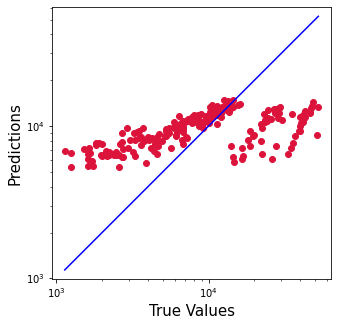

In [105]:
##########################################################
# Run Fold 1
##########################################################
run_model(df_fold=df_1, test_fold=test_val1)

Iteration    0: Cost 157566486.49   
Iteration   50: Cost 136104247.55   
Iteration  100: Cost 119562726.75   
Iteration  150: Cost 106813695.36   
Iteration  200: Cost 96987606.44   
Iteration  250: Cost 89414283.90   
Iteration  300: Cost 83577210.52   
Iteration  350: Cost 79078296.83   
Iteration  400: Cost 75610727.82   
Iteration  450: Cost 72938035.45   
b,w found by gradient descent: 3.61,[157.49   1.59 116.22   4.27   2.64   1.91   1.56] 
prediction: 9566.62, target value: 5729.0053
prediction: 11787.62, target value: 11833.7823
prediction: 6934.07, target value: 4906.40965
prediction: 8574.71, target value: 36197.699
prediction: 7975.75, target value: 4137.5227
prediction: 14789.16, target value: 13831.1152
prediction: 7007.11, target value: 33907.547999999995
prediction: 12992.78, target value: 11674.13
prediction: 7174.01, target value: 1141.4451
prediction: 6408.69, target value: 3378.91
prediction: 12267.58, target value: 11512.405
prediction: 8434.88, target value: 5385.

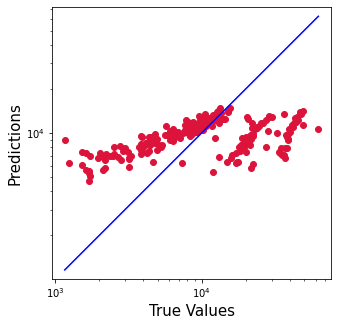

In [106]:
##########################################################
# Run Fold 2
##########################################################
run_model(df_fold=df_2, test_fold=test_val2)

Iteration    0: Cost 157566486.49   
Iteration   50: Cost 136104247.55   
Iteration  100: Cost 119562726.75   
Iteration  150: Cost 106813695.36   
Iteration  200: Cost 96987606.44   
Iteration  250: Cost 89414283.90   
Iteration  300: Cost 83577210.52   
Iteration  350: Cost 79078296.83   
Iteration  400: Cost 75610727.82   
Iteration  450: Cost 72938035.45   
b,w found by gradient descent: 3.61,[157.49   1.59 116.22   4.27   2.64   1.91   1.56] 
prediction: 9566.62, target value: 5729.0053
prediction: 11787.62, target value: 11833.7823
prediction: 6934.07, target value: 4906.40965
prediction: 8574.71, target value: 36197.699
prediction: 7975.75, target value: 4137.5227
prediction: 14789.16, target value: 13831.1152
prediction: 7007.11, target value: 33907.547999999995
prediction: 12992.78, target value: 11674.13
prediction: 7174.01, target value: 1141.4451
prediction: 6408.69, target value: 3378.91
prediction: 12267.58, target value: 11512.405
prediction: 8434.88, target value: 5385.

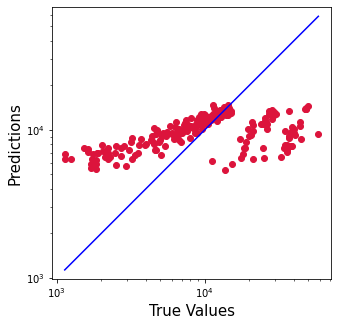

In [107]:
##########################################################
# Run Fold 3
##########################################################
run_model(df_fold=df_3, test_fold=test_val3)

Iteration    0: Cost 155695349.09   
Iteration   50: Cost 134321305.16   
Iteration  100: Cost 117877396.18   
Iteration  150: Cost 105226379.93   
Iteration  200: Cost 95493343.83   
Iteration  250: Cost 88005192.93   
Iteration  300: Cost 82244096.26   
Iteration  350: Cost 77811671.83   
Iteration  400: Cost 74401433.12   
Iteration  450: Cost 71777591.39   
b,w found by gradient descent: 3.62,[156.38   1.6  116.     4.6    2.6    1.96   1.56] 
prediction: 9521.24, target value: 5729.0053
prediction: 11718.87, target value: 11833.7823
prediction: 6898.44, target value: 4906.40965
prediction: 8535.38, target value: 36197.699
prediction: 7936.71, target value: 4137.5227
prediction: 14709.98, target value: 13831.1152
prediction: 6976.32, target value: 33907.547999999995
prediction: 12923.77, target value: 11674.13
prediction: 7146.22, target value: 1141.4451
prediction: 6376.18, target value: 3378.91
prediction: 12201.47, target value: 11512.405
prediction: 8392.08, target value: 5385.

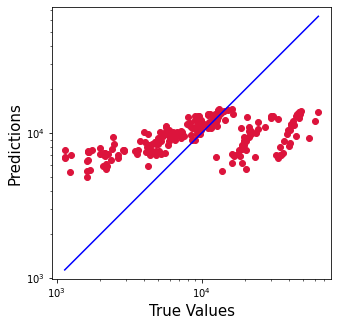

In [108]:
##########################################################
# Run Fold 4
##########################################################
run_model(df_fold=df_4, test_fold=test_val4)

Iteration    0: Cost 167588253.69   
Iteration   50: Cost 144537337.72   
Iteration  100: Cost 126846982.81   
Iteration  150: Cost 113270512.53   
Iteration  200: Cost 102851183.33   
Iteration  250: Cost 94854756.44   
Iteration  300: Cost 88717751.03   
Iteration  350: Cost 84007732.05   
Iteration  400: Cost 80392833.52   
Iteration  450: Cost 77618369.77   
b,w found by gradient descent: 3.71,[161.47   1.67 120.31   4.35   2.78   2.03   1.58] 
prediction: 9848.55, target value: 5729.0053
prediction: 12112.06, target value: 11833.7823
prediction: 7132.73, target value: 4906.40965
prediction: 8831.33, target value: 36197.699
prediction: 8209.68, target value: 4137.5227
prediction: 15209.87, target value: 13831.1152
prediction: 7219.45, target value: 33907.547999999995
prediction: 13362.68, target value: 11674.13
prediction: 7398.50, target value: 1141.4451
prediction: 6593.66, target value: 3378.91
prediction: 12615.04, target value: 11512.405
prediction: 8678.62, target value: 5385

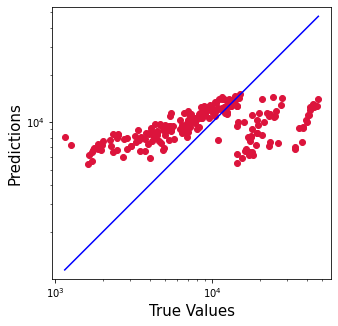

In [109]:
##########################################################
# Run Fold 5
##########################################################
run_model(df_fold=df_5, test_fold=test_val5)

Iteration    0: Cost 165794150.80   
Iteration   50: Cost 142718549.64   
Iteration  100: Cost 125008125.15   
Iteration  150: Cost 111415407.23   
Iteration  200: Cost 100982978.04   
Iteration  250: Cost 92976031.27   
Iteration  300: Cost 86830612.16   
Iteration  350: Cost 82113892.47   
Iteration  400: Cost 78493681.87   
Iteration  450: Cost 75715028.39   
b,w found by gradient descent: 3.72,[162.54   1.7  119.07   4.57   2.77   2.     1.61] 
prediction: 5968.72, target value: 4005.4225
prediction: 10017.60, target value: 15828.821730000001
prediction: 9334.88, target value: 7243.8136
prediction: 9271.87, target value: 6710.1919
prediction: 7275.56, target value: 3906.127
prediction: 6792.40, target value: 2842.76075
prediction: 15090.90, target value: 14901.5167
prediction: 7649.96, target value: 4544.2348
prediction: 12436.84, target value: 11837.16
prediction: 9969.84, target value: 6940.90985
prediction: 9299.32, target value: 5375.0380000000005
prediction: 12702.36, target v

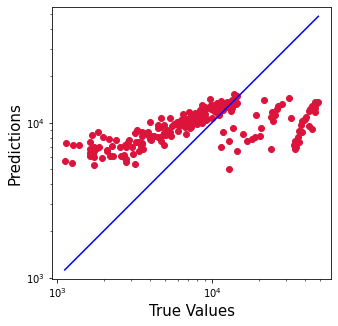

In [110]:
##########################################################
# Run Fold 6
##########################################################
run_model(df_fold=df_6, test_fold=test_val6)

In [111]:
##########################################################
# merge results
##########################################################
results = pd.DataFrame({'kfold': [1], 'gradient_descent': [3.68], 'cost': [75415038.38]})
results = results.append({'kfold': 2, 'gradient_descent': 3.64, 'cost': 74104010.97}, ignore_index=True)
results = results.append({'kfold': 3, 'gradient_descent': 3.64, 'cost': 74104010.97}, ignore_index=True)
results = results.append({'kfold': 4, 'gradient_descent': 3.67, 'cost': 74049902.16}, ignore_index=True)
results = results.append({'kfold': 5, 'gradient_descent': 3.67, 'cost': 75170389.94}, ignore_index=True)
results = results.append({'kfold': 6, 'gradient_descent': 3.64, 'cost': 74494894.62}, ignore_index=True)

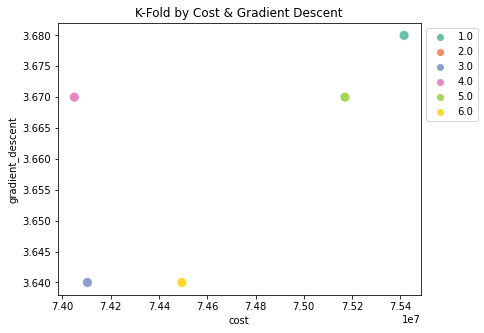

In [112]:
##########################################################
# Plot Folds results
##########################################################
plt.figure(figsize=(6.5,5))
sns.scatterplot(data = results, x = 'cost', y = 'gradient_descent', hue = 'kfold', s=100, palette="Set2").set(title='K-Fold by Cost & Gradient Descent')
plt.legend(markerscale=1, loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
plt.show()